<a href="https://colab.research.google.com/github/10K920/Suspicious-Transaction-Detector/blob/main/Suspicious_Transaction_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 445449, edward.kang@wustl.edu, Kang, Edward (Yu Sung)
# 431147, f.moon@wustl.edu, Moon, Frank
# 435472, lee.c@wustl.edu, Lee, Chang Hi
# 444516, kang.w@wustl.edu, Kang, Won Young

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read the Data
train = pd.read_csv('../input/suspicious-transaction-detection/train.csv')
test = pd.read_csv('../input/suspicious-transaction-detection/test.csv')

# Create labels for training
train_y = train.Target

# Create training data
feature_cols = list(train.columns)
feature_cols = [e for e in feature_cols if e not in ('Target', 'TransactionID')]
train_X = train[feature_cols]
test_X = test[feature_cols]

#print(train_X.head)

/kaggle/input/suspicious-transaction-detection/sampleSubmission.csv
/kaggle/input/suspicious-transaction-detection/train.csv
/kaggle/input/suspicious-transaction-detection/test.csv


In [ ]:
# Preprocessing the data 
from sklearn.preprocessing import LabelEncoder

# Distinguish different types of columns
categorical_cols = [e for e in feature_cols if e in ('Goods', 'A_0', 'A_1', 'E_0', 'E_1', 'M_0', 'M_1',  'C_5', 'C_23', 'C_24', 'C_25', 'C_26', 'C_27', 'C_28', 'O_2', 'O_4', 'O_6', 'O_7', 'O_8', 'O_10', 'O_11', 'O_12', 'O_13', 'O_14', 'O_15', 'O_16', 'O_17', 'O_19', 'O_21', 'O_23', 'O_24', 'O_25', 'O_26', 'O_27', 'O_31', 'O_32', 'O_35', 'O_36', 'O_39')]
boolean_cols = [e for e in feature_cols if e in ('C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_6', 'C_7', 'C_8', 'O_28', 'O_30')]
gaussian_cols = [e for e in feature_cols if e not in boolean_cols if e not in categorical_cols]

# Convert categorical/boolean columns into label 
train_X[categorical_cols] = train_X[categorical_cols].apply(LabelEncoder().fit_transform) #this
train_X[boolean_cols] = train_X[boolean_cols].apply(LabelEncoder().fit_transform)# and this causes one of the warnings
test_X[categorical_cols] = test_X[categorical_cols].apply(LabelEncoder().fit_transform) # this too
test_X[boolean_cols] = train_X[boolean_cols].apply(LabelEncoder().fit_transform) # this too

# Fill NA entries for Gaussian columns with their mean values
mean_values_tr = train_X[gaussian_cols].describe().loc['mean']
mean_values_te = test_X[gaussian_cols].describe().loc['mean']
train_X.fillna(value = mean_values_tr, inplace = True) # This causes one of the warnings 
test_X.fillna(value = mean_values_te, inplace = True) # this too

# Preprocess timestamp to only contain hour
train_X['Timestamp'] = train_X['Timestamp'].astype('datetime64[ns]').dt.hour # these too
test_X['Timestamp'] = test_X['Timestamp'].astype('datetime64[ns]').dt.hour

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
train_X

,Timestamp,Amount,Goods,T_0,T_1,T_2,T_3,T_4,T_5,T_6,...,O_36,O_37,O_38,O_39,A_0,A_1,E_0,E_1,M_0,M_1
0,1,58.14,0,30.000000,30.0,30.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,61,58,59,58,2,1690
1,4,47.07,0,4.000000,4.0,213.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,155,58,59,14,2,1690
2,7,22.31,2,169.827351,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,148,100.000000,0.000000,0,311,69,14,14,0,1513
3,6,149.94,4,169.827351,0.0,163.682501,18.127789,21.958332,54.326518,69.964004,...,194,100.000000,0.000000,0,53,58,53,52,1,1009
4,6,117.01,0,129.000000,129.0,130.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,140,58,59,21,2,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472427,7,39.11,0,277.000000,277.0,277.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,16,58,59,52,2,1690
472428,9,30.77,0,310.000000,310.0,484.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,53,58,59,58,2,1690
472429,11,107.84,0,188.000000,188.0,365.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,90,58,59,2,2,1690
472430,1,30.02,0,108.000000,108.0,166.000000,18.127789,145.515451,54.326518,69.964004,...,514,99.745044,0.091941,3,161,58,59,14,2,1690


In [ ]:
# Feature selection 
from sklearn.feature_selection import SelectKBest, f_classif
selected_k_features = SelectKBest(f_classif, k = 400) # choose how many to keep
new_train_X = selected_k_features.fit_transform(train_X, train_y)
mask = selected_k_features.get_support()
selected_columns = train_X.columns[mask]

# select features 
new_train_X = pd.DataFrame(new_train_X, columns=selected_columns)
new_test_X = test_X[selected_columns]

print(new_train_X.head)

<bound method NDFrame.head of         Timestamp  Amount  Goods         T_0    T_1         T_2        T_3  \
0             1.0   58.14    0.0   30.000000   30.0   30.000000  18.127789   
1             4.0   47.07    0.0    4.000000    4.0  213.000000  18.127789   
2             7.0   22.31    2.0  169.827351    0.0    0.000000   0.000000   
3             6.0  149.94    4.0  169.827351    0.0  163.682501  18.127789   
4             6.0  117.01    0.0  129.000000  129.0  130.000000  18.127789   
...           ...     ...    ...         ...    ...         ...        ...   
472427        7.0   39.11    0.0  277.000000  277.0  277.000000  18.127789   
472428        9.0   30.77    0.0  310.000000  310.0  484.000000  18.127789   
472429       11.0  107.84    0.0  188.000000  188.0  365.000000  18.127789   
472430        1.0   30.02    0.0  108.000000  108.0  166.000000  18.127789   
472431        3.0  701.02    0.0  169.827351    0.0  163.682501  18.127789   

               T_4        T_5    

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Choose model and train 
reg = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.2, max_depth = 1, random_state = 0).fit(new_train_X, train_y)

# Estimate in sample classification error
prob = reg.predict_proba(new_train_X)[:,1]
prediction_train = np.where(prob > 0.5, 1, 0)
difference = prediction_train - train_y 
result = np.where(difference == 0, 1, 0)
accuracy = float(result.sum()) / float(result.size)
print("In sample accuracy: ", accuracy )

In sample accuracy:  0.9717715988756054


In [ ]:
# Make predictions and Create submission file 
prediction = reg.predict_proba(new_test_X)[:,1] # choose p(y=1) and discard p(y=0)
my_submission = pd.DataFrame({'TransactionID': test.TransactionID, 'Target':prediction})
my_submission.to_csv('submission.csv', index=False)

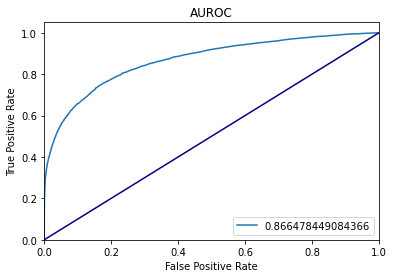

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_prob = reg.predict_proba(new_train_X)
y_score = reg.decision_function(new_train_X)

roc_auc = dict()
fpr, tpr, _ = roc_curve(train_y, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=roc_auc)
plt.plot([0, 1], [0, 1], color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC')
plt.legend(loc="lower right")
plt.show()